Context
This dataset is originally from the National Institute of Diabetes and
Digestive and Kidney Diseases. The objective is to predict based on
diagnostic measurements whether a patient has diabetes.
Content
Several constraints were placed on the selection of these instances from a
larger database. In particular, all patients here are females at least 21 years
old of Pima Indian heritage.
• Pregnancies: Number of times pregnant
• Glucose: Plasma glucose concentration 2 hours in an oral glucose
tolerance test
• BloodPressure: Diastolic blood pressure (mm Hg)
• SkinThickness: Triceps skin fold thickness (mm)
• Insulin: 2-Hour serum insulin (mu U/ml)
• BMI: Body mass index (weight in kg/(height in m)^2)
• DiabetesPedigreeFunction: Diabetes pedigree function
• Age: Age (years)
• Outcome: Class variable (0 or 1)

1. Prepare the provided Diabetes dataset, implement ONE of the classification techniques and evaluate the performance using the proper metrics for the binary classification of the variable “Outcome”

In [94]:
install.packages("randomForest")



The downloaded binary packages are in
	/var/folders/rd/jfxc79756t9g0g5f4ytyb6l40000gn/T//Rtmpq88GOO/downloaded_packages


In [95]:
library(tidyverse)
library(caret)
library(e1071)
library(randomForest)
library(pROC)

In [96]:
data <- read.csv('diabetes.csv')

In [97]:
head(data)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


In [103]:
summary(data)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

Glucose
Normal: < 140
Pre-Diabetes: 140-199
Diabetes: > 200

Insulin Ranges
Low: < 25 μU/ml
Normal: 25 - 230 μU/ml
High: > 230 μU/ml

Blood pressure
Normal: < 80
Elevated: 80-89
High: > 90

BMI
Normal: 18.5-24.9
Overweight: 25-29.9
Obesity: >30

Outcome:
0 = no diabetes
1 = diabetes

This is for me to understand some of the data im dealing with since im not in health field. Also printed out summary of data to get a picture of the data that im working with

In [107]:
sum(is.na(data))

[1] 0

Since I have 0s in some of the columns, It means that they have not been recorded so I want to print out the columns with 0s and how many zeros are in there so i can see what i can do with my missing data. Prior to that I am going to count my rows to see how much rows I have in my diabetes file.  

In [109]:
number_of_rows <- nrow(data)
cat("Number of rows in the dataset:", number_of_rows, "\n")

Number of rows in the dataset: 768 


In [110]:
num_zeros_glucose <- sum(data$Glucose == 0)
num_zeros_bp <- sum(data$BloodPressure == 0)
num_zeros_skinthickness <- sum(data$SkinThickness == 0)
num_zeros_insulin <- sum(data$Insulin == 0)
num_zeros_bmi <- sum(data$BMI == 0)

In [111]:
cat("Number of zeros in Glucose:", num_zeros_glucose, "\n")
cat("Number of zeros in BloodPressure:", num_zeros_bp, "\n")
cat("Number of zeros in SkinThickness:", num_zeros_skinthickness, "\n")
cat("Number of zeros in Insulin:", num_zeros_insulin, "\n")
cat("Number of zeros in BMI:", num_zeros_bmi, "\n")

Number of zeros in Glucose: 5 
Number of zeros in BloodPressure: 35 
Number of zeros in SkinThickness: 227 
Number of zeros in Insulin: 374 
Number of zeros in BMI: 11 


High number of missing data from Skin_thickness and Insulin. However, I do not think median would be a good idea for insulin since it can lead to a big wide range of bias. Skin Thickness can somewhat correlate with BMI but I do not worry about skinthickness compared to insulin levels when it comes to diabetis since other factors can play bigger.

In [113]:
outcome_counts <- table(data$Outcome)


cat("Number of non-diabetic (0):", outcome_counts[1], "\n")
cat("Number of diabetic (1):", outcome_counts[2], "\n")

Number of non-diabetic (0): 500 
Number of diabetic (1): 268 


I am checking to get a count of non-diabetic, and diabetic count for my data. I also will be checking how many rows are effected with missing values for skinthickness and insulin in my non-diabetic and diabetic. 

In [115]:

zero_skinthickness_outcome <- table(data$Outcome, data$SkinThickness == 0)

zero_insulin_outcome <- table(data$Outcome, data$Insulin == 0)


cat("Number of non-diabetic (0) with zero SkinThickness:", zero_skinthickness_outcome[1,2], "\n")
cat("Number of diabetic (1) with zero SkinThickness:", zero_skinthickness_outcome[2,2], "\n")
cat("Number of non-diabetic (0) with zero Insulin:", zero_insulin_outcome[1,2], "\n")
cat("Number of diabetic (1) with zero Insulin:", zero_insulin_outcome[2,2], "\n")

Number of non-diabetic (0) with zero SkinThickness: 139 
Number of diabetic (1) with zero SkinThickness: 88 
Number of non-diabetic (0) with zero Insulin: 236 
Number of diabetic (1) with zero Insulin: 138 


I wanted to see what the total count of outcome is for the missing values. 

Since I do not want to delete the rows with the missing values or replace them with a mean or median average since it will make the data possibly bias. I will try to do KNN which will group common attributes and then the rows that have similiar attributes will plug in a possible insulin and skin thickness reading with KNN. 

In [118]:
install.packages("VIM")


The downloaded binary packages are in
	/var/folders/rd/jfxc79756t9g0g5f4ytyb6l40000gn/T//Rtmpq88GOO/downloaded_packages


In [119]:
library(VIM)

In [120]:
data[data$Glucose == 0, "Glucose"] <- NA
data[data$BloodPressure == 0, "BloodPressure"] <- NA
data[data$SkinThickness == 0, "SkinThickness"] <- NA
data[data$Insulin == 0, "Insulin"] <- NA
data[data$BMI == 0, "BMI"] <- NA

In [121]:
sum(is.na(data))

[1] 652

In [122]:
data_imputed <- kNN(data, variable=c("Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"), k=5)


In [123]:
summary(data_imputed$Glucose)
summary(data_imputed$BloodPressure)
summary(data_imputed$SkinThickness)
summary(data_imputed$Insulin)
summary(data_imputed$BMI)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   44.0    99.0   117.0   121.6   141.0   199.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   24.0    64.0    72.0    72.5    80.0   122.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    7.0    23.0    30.0    29.3    35.0    99.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   14.0    86.0   125.0   145.1   175.2   846.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.20   27.50   32.30   32.46   36.60   67.10 

In [124]:
num_rows_with_na_after <- sum(apply(data_imputed, 1, function(x) any(is.na(x))))
cat("Number of rows with at least one NA value after imputation:", num_rows_with_na_after, "\n")



Number of rows with at least one NA value after imputation: 0 


I did summary of data_imputed for my selected columns to see what changed after using KNN to fill in missing data. I also did error check on number of rows with at least one NA value to make sure it equals 0. Which means it worked property. Below I checked to make sure count of outcomes was the same to prior to me changing missing values

In [132]:
outcome_counts <- table(data_imputed$Outcome)


cat("Number of non-diabetic (0):", outcome_counts[1], "\n")
cat("Number of diabetic (1):", outcome_counts[2], "\n")


Number of non-diabetic (0): 500 
Number of diabetic (1): 268 


In [133]:
summary(data_imputed)

  Pregnancies        Glucose      BloodPressure   SkinThickness 
 Min.   : 0.000   Min.   : 44.0   Min.   : 24.0   Min.   : 7.0  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 64.0   1st Qu.:23.0  
 Median : 3.000   Median :117.0   Median : 72.0   Median :30.0  
 Mean   : 3.845   Mean   :121.6   Mean   : 72.5   Mean   :29.3  
 3rd Qu.: 6.000   3rd Qu.:141.0   3rd Qu.: 80.0   3rd Qu.:35.0  
 Max.   :17.000   Max.   :199.0   Max.   :122.0   Max.   :99.0  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   : 14.0   Min.   :18.20   Min.   :0.0780           Min.   :21.00  
 1st Qu.: 86.0   1st Qu.:27.50   1st Qu.:0.2437           1st Qu.:24.00  
 Median :125.0   Median :32.30   Median :0.3725           Median :29.00  
 Mean   :145.1   Mean   :32.46   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:175.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome      Glucose_im

Used this to check old data with new data cleaned up (missing values knn changed). numbers appear to be very logical. 

In [135]:
head(data_imputed)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_imp,BloodPressure_imp,SkinThickness_imp,Insulin_imp,BMI_imp
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,6,148,72,35,175,33.6,0.627,50,1,FALSE,FALSE,FALSE,TRUE,FALSE
2,1,85,66,29,55,26.6,0.351,31,0,FALSE,FALSE,FALSE,TRUE,FALSE
3,8,183,64,28,325,23.3,0.672,32,1,FALSE,FALSE,TRUE,TRUE,FALSE
4,1,89,66,23,94,28.1,0.167,21,0,FALSE,FALSE,FALSE,FALSE,FALSE
5,0,137,40,35,168,43.1,2.288,33,1,FALSE,FALSE,FALSE,FALSE,FALSE
6,5,116,74,27,112,25.6,0.201,30,0,FALSE,FALSE,TRUE,TRUE,FALSE


In [136]:
data_imputed_clean <- data_imputed %>% select(-ends_with("_imp"))

In [137]:
head(data_imputed_clean)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,175,33.6,0.627,50,1
2,1,85,66,29,55,26.6,0.351,31,0
3,8,183,64,28,325,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,27,112,25.6,0.201,30,0


Got rid of imp columns so machine learning model could understand better later on. 

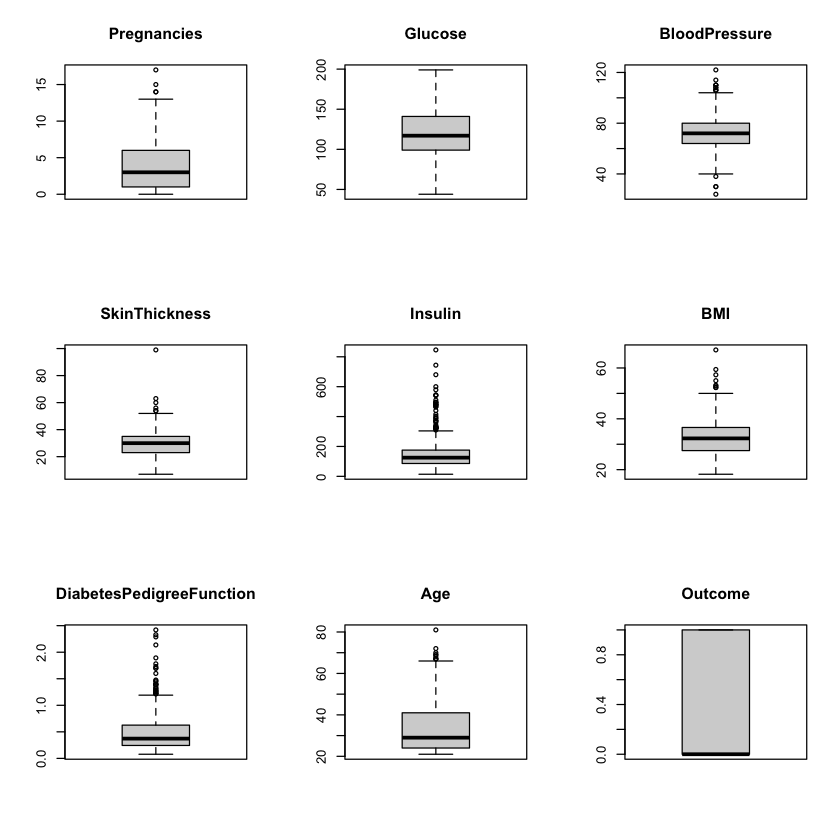

In [139]:
par(mfrow = c(3, 3))
numeric_columns <- names(data_imputed_clean)[sapply(data_imputed_clean, is.numeric)]
for (column in numeric_columns) {
  boxplot(data_imputed_clean[[column]], main = column)
}
par(mfrow = c(1, 1)) 

Checking for outliers, but since insulin, glucose, blood pressure could show as outliers that can be normal since its a health metric which means it could be a actually high reading. 

In [149]:
data_imputed_clean$Outcome <- as.factor(data_imputed_clean$Outcome)


In [150]:
head(data_imputed_clean)
summary(data_imputed_clean)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<fct>
1,6,148,72,35,175,33.6,0.627,50,1
2,1,85,66,29,55,26.6,0.351,31,0
3,8,183,64,28,325,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,27,112,25.6,0.201,30,0


  Pregnancies        Glucose      BloodPressure   SkinThickness 
 Min.   : 0.000   Min.   : 44.0   Min.   : 24.0   Min.   : 7.0  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 64.0   1st Qu.:23.0  
 Median : 3.000   Median :117.0   Median : 72.0   Median :30.0  
 Mean   : 3.845   Mean   :121.6   Mean   : 72.5   Mean   :29.3  
 3rd Qu.: 6.000   3rd Qu.:141.0   3rd Qu.: 80.0   3rd Qu.:35.0  
 Max.   :17.000   Max.   :199.0   Max.   :122.0   Max.   :99.0  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   : 14.0   Min.   :18.20   Min.   :0.0780           Min.   :21.00  
 1st Qu.: 86.0   1st Qu.:27.50   1st Qu.:0.2437           1st Qu.:24.00  
 Median :125.0   Median :32.30   Median :0.3725           Median :29.00  
 Mean   :145.1   Mean   :32.46   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:175.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
 Outcome
 0:500  
 1:268  


In [151]:
set.seed(123)
trainIndex <- createDataPartition(data_imputed_clean$Outcome, p = 0.8, list = FALSE)
data_train <- data_imputed_clean[trainIndex, ]
data_test <- data_imputed_clean[-trainIndex, ]

I will set the seed to make sure data is replicable everytime I run it. I set it at 80 percent training and 20 percent training. Everytime I run this it should give me same set of standards. 

In [159]:
data_train$Outcome <- as.factor(data_train$Outcome)
data_test$Outcome <- as.factor(data_test$Outcome)


Data train contains 80 percent of data for training with outcome as factor, data test contains 20 percent of data for testing with outcome as factor. 

In [153]:
set.seed(123)
model_rf <- randomForest(Outcome ~ ., data = data_train, importance = TRUE)


set seed ensures reproduciblity. Model is RANDOM FOREST which will use data train data to train (with predictor variables) in order to make predictions and then later on it will use data test to see if it can predict data_test outcome correctly.

In [154]:
predictions <- predict(model_rf, data_test)

In [155]:
conf_matrix <- confusionMatrix(predictions, data_test$Outcome)
print(conf_matrix)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 92  8
         1  8 45
                                         
               Accuracy : 0.8954         
                 95% CI : (0.8357, 0.939)
    No Information Rate : 0.6536         
    P-Value [Acc > NIR] : 5.216e-12      
                                         
                  Kappa : 0.7691         
                                         
 Mcnemar's Test P-Value : 1              
                                         
            Sensitivity : 0.9200         
            Specificity : 0.8491         
         Pos Pred Value : 0.9200         
         Neg Pred Value : 0.8491         
             Prevalence : 0.6536         
         Detection Rate : 0.6013         
   Detection Prevalence : 0.6536         
      Balanced Accuracy : 0.8845         
                                         
       'Positive' Class : 0              
                                         


True Postive is 92, False Positive is 8, False Negative is 8 and True Negative is 45

Accurary is .8954 (89.54%) which is the proportion of correctly classified instances. This is really good because its 89 percent correct. 

95 % Confidence interval is between 83 percent and 93 percent. This is the accuracy rate which is very good. 

No information rate means that my model can predict the most frequent class which is non diabetic 65.36 % of the time. If its job was to just determine main outcome. This is not a bad percentage. 

My p-value shows that my models accuracy is better than NIR so I reject NULL Hypothesis. P-Value shows that my model is better than random guessing majority class. 

Kappa Range falls between -1 to 1. .7691 means their is a big aggrement beyond chance. My model appears to be good. 

Sensitivity 92% shows my model is able to correctly identify non diabetic (class 0) cases correctly. This is a great percentage. 

Specificity 84% shows my model is able to correctly identify diabetic (class 1) cases correctly. This is a good percentage. 

Prevalence means the proportion of the actual positives in the dataset which is non-diabetic. 65 % of positive cases seem to be a good balance of data between negative and postive cases. Detection Rate at 60 percent shows true postives out of total instances. 

Detection Prevalence is 65 percent which is proportion of instances predicted as postive (non-diabetic) by the model. 

Balanced Accurary is average of sensitivy and specificity. 88 percent accurary is good. 

Setting levels: control = 0, case = 1

Setting direction: controls < cases



AUC: 0.8845283 


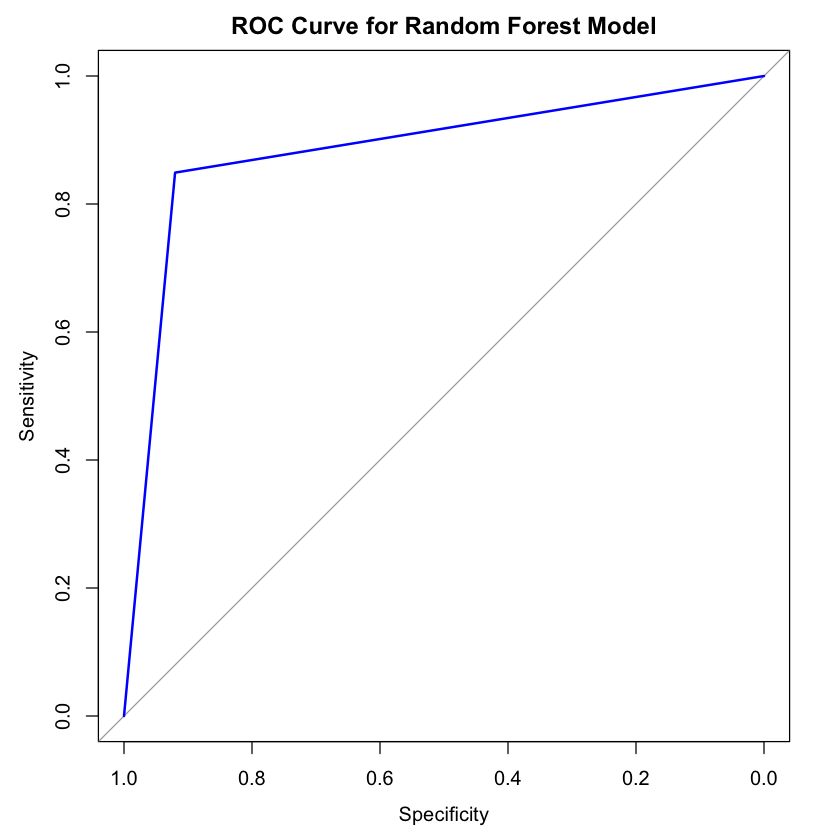

In [174]:



roc_curve <- roc(data_test$Outcome, as.numeric(predictions))
auc_value <- auc(roc_curve)
cat("AUC:", auc_value, "\n")


plot(roc_curve, main = "ROC Curve for Random Forest Model", col = "blue")